In [1]:
import os

import h5py
import numpy as np
import matplotlib.pyplot as plt


plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{physics}'
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")

In [2]:
h5py.File('datasets/1.hdf5').keys()

<KeysViewHDF5 ['Covariances', 'Expected_returns', 'Final_circuit_sample_probabilities', 'Final_circuit_sample_states', 'Max_cost', 'Min_cost', 'Min_cost_state', 'N', 'Normalized_cost', 'Optimizer_maxfev', 'Optimizer_nfev', 'Rng_seed', 'k', 'layers', 'type']>

In [3]:
results_1, results_2 = {}, {}
for file_name in os.listdir('datasets'):
    if file_name != '.DS_Store':
        with h5py.File('datasets/'+file_name) as f:
            Normalized_cost = f['Normalized_cost'][()]
            if f['type'][()] == 1:
                if f['N'][()] not in list(results_1.keys()):
                    results_1[f['N'][()]] = [Normalized_cost]
                else:
                    results_1[f['N'][()]].append(Normalized_cost)
            if f['type'][()] == 2:
                if f['N'][()] not in list(results_2.keys()):
                    results_2[f['N'][()]] = [Normalized_cost]
                else:
                    results_2[f['N'][()]].append(Normalized_cost)
        
final_results_1, final_results_2 = {}, {}
for layer in np.sort(list(results_1.keys())):
    final_results_1[layer] = (np.mean(results_1[layer]), np.std(results_1[layer]), np.min(results_1[layer]))
for layer in np.sort(list(results_2.keys())):
    final_results_2[layer] = (np.mean(results_2[layer]), np.std(results_2[layer]), np.min(results_2[layer]))

In [6]:
final_results_1

{2: (7.01339638228182e-16, 3.288598694723222e-15, 0.0),
 3: (0.00019119701817834822, 0.001902386310993784, 0.0),
 4: (0.003947393021961462, 0.02024512907670136, 0.0),
 5: (0.010000034325118335, 0.03550062377714703, 0.0),
 6: (0.024439355089836964, 0.06398334189120813, 0.0),
 7: (0.04379484212885593, 0.08507884080918092, 0.0),
 8: (0.191133651733557, 0.20228580706113872, 0.0),
 9: (0.33284236943340817, 0.21929869059185497, 2.117036582142621e-16),
 10: (0.37486074141169795, 0.21974803451067926, 1.9191670879875863e-16),
 11: (0.42464291136375887, 0.21834082168986488, 6.262987534832833e-16),
 12: (0.4608828137101343, 0.18520075127030203, 0.022106134339211814),
 13: (0.5097642069631018, 0.17275060656918953, 0.16789526854672815),
 14: (0.525796952193879, 0.17860578326465376, 0.12126647163855567),
 15: (0.5256774935881923, 0.1558676828439578, 0.10367266751460769)}

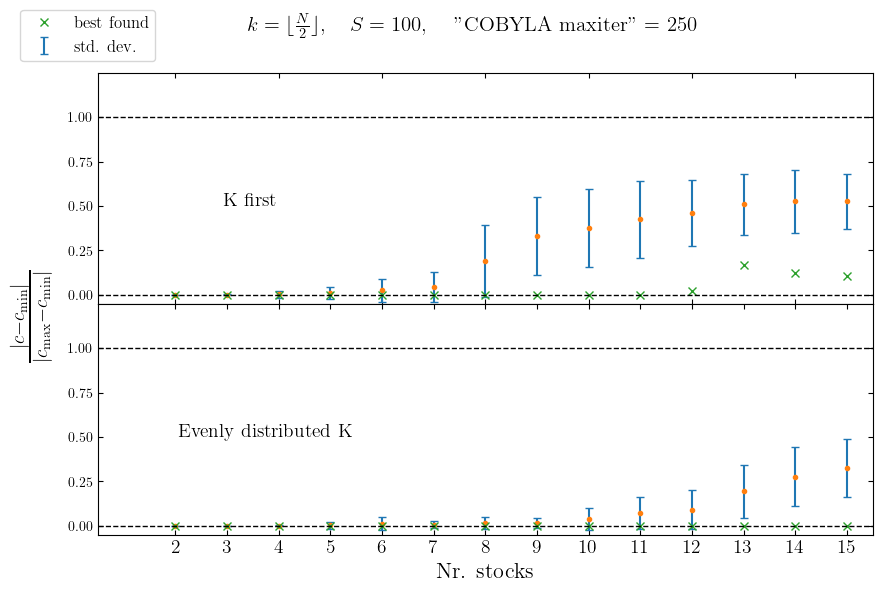

In [15]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
fig.suptitle(r'$k=\lfloor\frac{N}{2}\rfloor, \quad S=100, \quad$ "COBYLA maxiter" = 250',size=15)
plt.subplots_adjust(hspace=0)
# Shared x-values
n_vals = [2 + i for i in range(len(list(final_results_1.keys())))]
err_scaling = 1

# Plottig stuff
ax[0].errorbar(n_vals, [final_results_1[key][0] for key in list(final_results_1.keys())], yerr = [err_scaling*final_results_1[key][1] for key in list(final_results_1.keys())], capsize=3, ls='None', label=f'std. dev.')
ax[0].plot(n_vals,[final_results_1[key][0] for key in list(final_results_1.keys())], 'o', ms=3)
ax[0].plot(n_vals,[final_results_1[key][2] for key in list(final_results_1.keys())], 'x', ms=6, label='best found')

ax[1].errorbar(n_vals, [final_results_2[key][0] for key in list(final_results_2.keys())], yerr = [err_scaling*final_results_2[key][1] for key in list(final_results_2.keys())], capsize=3, ls='None', label=f'std. dev.')
ax[1].plot(n_vals,[final_results_2[key][0] for key in list(final_results_2.keys())], 'o', ms=3)
ax[1].plot(n_vals,[final_results_2[key][2] for key in list(final_results_2.keys())], 'x', ms=6, label='best found')


ax[0].text(2.925,0.5,'K first',size=14)
ax[1].text(2.05,0.5,r'Evenly distributed K',size=14)

_y_ticks_ = [0.0,0.25,0.50,0.75,1.00]
for _ax_ in range(2):
    ax[_ax_].set_xlim(0.5,max(n_vals)+0.5)
    ax[_ax_].set_ylim(-0.05,1.25)
    ax[_ax_].hlines(0,0.5,max(n_vals)+0.5, ls='--',color='k',lw=1)
    ax[_ax_].hlines(1,0.5,max(n_vals)+0.5, ls='--',color='k',lw=1)
    ax[_ax_].set_yticks(_y_ticks_)

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[1].text(-1.2,1,r'$\frac{|c-c_{\textrm{min}}|}{|c_{\textrm{max}}-c_{\textrm{min}}|}$',rotation=90, size=20)

ax[0].legend(loc=(-0.1,1.05),fontsize=12)

ax[1].set_xticks(n_vals)
ax[1].set_xticklabels([str(n) for n in n_vals], size=14)
ax[1].set_xlabel(r'Nr. stocks', size=16)


plt.savefig('plots/initialization_strat_varying_N.png', dpi=300)
plt.show()

In [24]:
L2, N = 5, 15

int(np.floor((L2*(N-1)) / (N-1+N-2)))

2.0